<a href="https://colab.research.google.com/github/sunnyinAI/EE769-IML/blob/main/A2_22D1631.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Objective 1
###  Q.1. Let your code read the data directly from https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv

In [16]:
data = pd.read_csv('/content/drive/MyDrive/MouseTrain.csv')

In [17]:
data

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


In [18]:
data.shape

(762, 79)

###  Q.2. Perform exploratory data analysis to find out:


In [19]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,...,762.000000,582.000000,567.000000,762.000000,702.000000,762.000000,612.000000,582.000000,582.000000,762.000000
mean,0.437715,0.629456,0.319844,2.311905,3.882665,0.232722,0.182514,3.513055,0.212083,1.447201,...,0.226365,0.156693,0.136973,0.122095,0.129689,0.450260,0.166017,0.182322,0.206105,1.357954
std,0.275175,0.274954,0.046536,0.342923,0.929202,0.039521,0.026548,1.268395,0.031066,0.510631,...,0.029564,0.030299,0.029633,0.014928,0.022832,0.062304,0.059256,0.041938,0.058118,0.337107
min,0.170634,0.264085,0.194160,1.414914,1.794716,0.063236,0.064043,1.369898,0.112812,0.429032,...,0.162642,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.294759,0.481011,0.290199,2.069609,3.186726,0.206446,0.165306,2.424669,0.190616,1.213118,...,0.205750,0.136188,0.116234,0.110655,0.111676,0.407385,0.124382,0.152365,0.164155,1.075929
50%,0.371534,0.569058,0.317696,2.309711,3.800418,0.229032,0.181405,3.319506,0.210077,1.347557,...,0.224439,0.150386,0.131542,0.122600,0.126138,0.450500,0.153342,0.174184,0.191754,1.351277
75%,0.486749,0.700621,0.346747,2.534053,4.471656,0.255064,0.197664,4.493452,0.233947,1.542629,...,0.241714,0.170685,0.150942,0.133617,0.142831,0.488438,0.195401,0.205146,0.235925,1.616752
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.434624,0.317066,6.947290,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.210908,0.759588,0.479763,0.360692,0.413903,2.129791


### Q.2. a. Which variables are usable, and which are not?

In [20]:
pd.set_option('display.max_rows', None)
data.isnull().sum().sort_values(ascending = False)

BCL2_N                195
H3MeK4_N              180
EGR1_N                180
BAD_N                 180
H3AcK18_N             150
pCFOS_N                60
ELK_N                  15
Bcatenin_N             15
MEK_N                   4
AcetylH3K9_N            0
nNOS_N                  0
ERBB4_N                 0
ARC_N                   0
BAX_N                   0
RRP1_N                  0
DYRK1A_N                0
ADARB1_N                0
S6_N                    0
Tau_N                   0
pPKCG_N                 0
pGSK3B_N                0
P70S6_N                 0
NUMB_N                  0
CDK5_N                  0
GluR4_N                 0
GFAP_N                  0
GluR3_N                 0
TIAM1_N                 0
IL1B_N                  0
P3525_N                 0
pCASP9_N                0
PSD95_N                 0
SNCA_N                  0
Ubiquitin_N             0
pGSK3B_Tyr216_N         0
SHH_N                   0
pS6_N                   0
SYP_N                   0
CaNA_N      

### Q.2. b. Are there significant correlations among variables?

In [21]:
# reference https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on
# Create correlation matrix
corr_matrix = data.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

<ipython-input-21-cce49f2e8026>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [22]:
upper

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,NaN,0.961321,0.407110,0.314795,0.340011,0.182126,0.085401,0.158167,0.082463,0.811398,...,0.223812,0.250262,0.150564,0.358480,0.224427,0.035929,0.406055,0.324198,0.518361,0.457907
ITSN1_N,NaN,NaN,0.495102,0.428745,0.421034,0.149509,0.068712,0.114789,0.200468,0.796880,...,0.220720,0.331306,0.247760,0.299066,0.300170,0.039384,0.354554,0.403525,0.558266,0.495085
BDNF_N,NaN,NaN,NaN,0.817986,0.746004,0.241501,0.332689,0.129602,0.569146,0.458951,...,0.112984,0.279752,0.210969,0.070504,0.265185,0.454025,0.207555,0.247121,0.331191,0.304098
NR1_N,NaN,NaN,NaN,NaN,0.866667,0.185322,0.220929,0.253744,0.599846,0.399791,...,0.100915,0.434723,0.369966,0.227674,0.364487,0.486483,0.253118,0.287997,0.404977,0.205033
NR2A_N,NaN,NaN,NaN,NaN,NaN,0.076446,0.079740,0.223203,0.362348,0.387644,...,0.237932,0.486259,0.321165,0.215495,0.426562,0.377628,0.292016,0.326056,0.468892,0.185840
pAKT_N,NaN,NaN,NaN,NaN,NaN,NaN,0.833135,0.425343,0.559547,0.008868,...,0.113274,0.283699,0.275549,0.329791,0.027823,0.199349,0.317508,0.313131,0.372945,0.245944
pBRAF_N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.332781,0.546442,0.072225,...,0.107594,0.312448,0.316789,0.268852,0.107951,0.232262,0.256479,0.366838,0.378236,0.204640
pCAMKII_N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.342195,0.095940,...,0.065394,0.052614,0.047891,0.417864,0.087144,0.187727,0.229161,0.137520,0.080201,0.361215
pCREB_N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204979,...,0.044608,0.145911,0.119731,0.291003,0.235981,0.383455,0.176392,0.124001,0.004925,0.054356
pELK_N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.190035,0.178375,0.048141,0.204637,0.155787,0.003932,0.234061,0.199574,0.277739,0.223832


In [23]:
# Find features with correlation greater than 0.75
corr1 = [column for column in upper.columns if any(upper[column] > 0.55)]
corr2 = [column for column in upper.columns if any(upper[column] > 0.75)]
corr3 = [column for column in upper.columns if any(upper[column] > 0.85)]
corr4 = [column for column in upper.columns if any(upper[column] > 0.95)]

In [24]:
corr1

['ITSN1_N',
 'NR1_N',
 'NR2A_N',
 'pBRAF_N',
 'pCREB_N',
 'pELK_N',
 'pERK_N',
 'pJNK_N',
 'PKCA_N',
 'pMEK_N',
 'pNR1_N',
 'pNR2A_N',
 'pNR2B_N',
 'pPKCAB_N',
 'AKT_N',
 'BRAF_N',
 'CAMKII_N',
 'CREB_N',
 'ELK_N',
 'ERK_N',
 'GSK3B_N',
 'JNK_N',
 'MEK_N',
 'TRKA_N',
 'RSK_N',
 'APP_N',
 'Bcatenin_N',
 'P38_N',
 'pMTOR_N',
 'DSCR1_N',
 'AMPKA_N',
 'NR2B_N',
 'pNUMB_N',
 'RAPTOR_N',
 'TIAM1_N',
 'NUMB_N',
 'P70S6_N',
 'pPKCG_N',
 'CDK5_N',
 'S6_N',
 'ADARB1_N',
 'BAX_N',
 'ARC_N',
 'ERBB4_N',
 'nNOS_N',
 'Tau_N',
 'GluR4_N',
 'IL1B_N',
 'P3525_N',
 'pCASP9_N',
 'PSD95_N',
 'SNCA_N',
 'Ubiquitin_N',
 'SHH_N',
 'BAD_N',
 'BCL2_N',
 'pS6_N',
 'pCFOS_N',
 'H3AcK18_N',
 'EGR1_N',
 'H3MeK4_N',
 'CaNA_N']

In [25]:
len(corr1)

62

In [26]:
len(corr2)

35

In [27]:
corr3

['ITSN1_N',
 'NR2A_N',
 'pERK_N',
 'pMEK_N',
 'pNR1_N',
 'pNR2B_N',
 'BRAF_N',
 'ERK_N',
 'Bcatenin_N',
 'pS6_N']

In [28]:
corr4

['ITSN1_N', 'BRAF_N', 'pS6_N']

### Q.2.  3. Are the classes balanced?

In [29]:
data.Genotype.value_counts()

Control    435
Ts65Dn     327
Name: Genotype, dtype: int64

In [30]:
data.Treatment_Behavior.value_counts()

Memantine_C/S    225
Memantine_S/C    225
Saline_C/S       180
Saline_S/C       132
Name: Treatment_Behavior, dtype: int64

### Q.3.  Develop a strategy to deal with missing variables. You can choose to impute the variable. The recommendedway is to use multivariate feature imputation (https://scikit-learn.org/stable/modules/impute.html)

In [31]:
before_imputation = data.iloc[:,:-2]
before_imputation

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
5,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.190469,0.131575,NaN,0.106476,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389
6,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,1.612036,...,0.181610,0.141806,NaN,0.097834,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484
7,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,1.424601,...,0.191561,0.141013,NaN,0.099494,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658
8,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,1.261891,...,0.186378,0.139589,NaN,0.105145,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599
9,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,1.414329,...,0.189523,0.183678,NaN,0.093300,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862


In [32]:
#https://www.geeksforgeeks.org/python-imputation-using-the-knnimputer/
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
after_imputation = pd.DataFrame(imputer.fit_transform(before_imputation))

In [33]:
after_imputation

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.120079,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.116616,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.110020,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.102995,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.106840,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
5,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.190469,0.131575,0.107732,0.106476,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389
6,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,1.612036,...,0.181610,0.141806,0.124860,0.097834,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484
7,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,1.424601,...,0.191561,0.141013,0.121412,0.099494,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658
8,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,1.261891,...,0.186378,0.139589,0.125592,0.105145,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599
9,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,1.414329,...,0.189523,0.183678,0.133451,0.093300,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862


### Q.4. Select metrics that you will use, such as accuracy, F1 score, balanced accuracy, AUC etc. Remember, you've two separate classification tasks – one is binary, the other has four classes. You may have to do some-reading about multi-class classification metrics.

Ans:
For binary classification:  accuracy, f1 score, balanced accuracy, AUC 
For mul

### Q.5. Using five-fold cross-validation (you can use GridSearchCV from scikit-learn) to find the reasonable (I cannot “best” because you have two separate classifications to perform) hyper-parameter settings for thefollowing model types:
b. RBF kernel SVM with kernel width and regularization as hyperparameters.
c. Neural network with single ReLU hidden layer and Softmax output (hyperparameters: number ofneurons, weight decay).
d. Random forest (max tree depth, max number of variables per node).

In [34]:
after_imputation

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.120079,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.116616,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.110020,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.102995,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.106840,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
5,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.190469,0.131575,0.107732,0.106476,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389
6,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,1.612036,...,0.181610,0.141806,0.124860,0.097834,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484
7,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,1.424601,...,0.191561,0.141013,0.121412,0.099494,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658
8,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,1.261891,...,0.186378,0.139589,0.125592,0.105145,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599
9,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,1.414329,...,0.189523,0.183678,0.133451,0.093300,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862


In [35]:
#dependent variables 
dependent = data.iloc[:,-2:]

In [36]:
x1 = dependent.iloc[:,0:1]
x1

,Genotype
0,Control
1,Control
2,Control
3,Control
4,Control
5,Control
6,Control
7,Control
8,Control
9,Control


In [37]:
x2 = dependent.iloc[:,1:2]
x2

,Treatment_Behavior
0,Memantine_C/S
1,Memantine_C/S
2,Memantine_C/S
3,Memantine_C/S
4,Memantine_C/S
5,Memantine_C/S
6,Memantine_C/S
7,Memantine_C/S
8,Memantine_C/S
9,Memantine_C/S


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x1 = le.fit_transform(x1)
x2 = le.fit_transform(x2)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
x1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
x2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [41]:
# data split for binary classification 
X_train1, X_test1, y_train1, y_test1 = train_test_split( after_imputation, x1, test_size=0.33, random_state=42)

In [42]:
# data split for multi-class classification 
X_train2, X_test2, y_train2, y_test2 = train_test_split( after_imputation, x2, test_size=0.33, random_state=42)

### Q.5. a. Linear SVM with rega. Linear SVM with regularization as hyperparameter.


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics
param_grid = {'penalty':['l2'],
              'loss':['squared_hinge'],
              'C': [0.1, 1, 10, 100], 
              'verbose': [0,1,5]} 
  
grid1 = GridSearchCV(LinearSVC(), param_grid, refit = True, cv=5)
  
# fitting the model for grid search
grid1.fit(X_train1, y_train1)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'loss': ['squared_hinge'],
                         'penalty': ['l2'], 'verbose': [0, 1, 5]})

In [44]:
from sklearn.inspection import permutation_importance
# print best parameter after tuning
print(grid1.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid1.best_estimator_)

{'C': 10, 'loss': 'squared_hinge', 'penalty': 'l2', 'verbose': 5}
LinearSVC(C=10, verbose=5)


In [ ]:
# grid1.best_estimator_.feature_importances()

In [47]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics
grid1_predictions = grid1.predict(X_test1)
  
# print classification report
print(classification_report(y_test1, grid1_predictions))
print(metrics.accuracy_score(y_test1, grid1_predictions))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       150
           1       0.88      1.00      0.94       102

    accuracy                           0.94       252
   macro avg       0.94      0.95      0.94       252
weighted avg       0.95      0.94      0.94       252

0.9444444444444444


### Q.5. b.  RBF KERNEL SVM with kernel width and regularization as hyperparameter

In [48]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid2 = GridSearchCV(SVC(), param_grid, refit = True, cv = 5)
  
# fitting the model for grid search
grid2.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [49]:
print(grid2.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid2.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


In [ ]:
# grid2.best_estimator_.feature_importances

In [50]:
grid2_predictions = grid2.predict(X_test2)
  
# print classification report
print(classification_report(y_test2, grid2_predictions))
print(metrics.accuracy_score(y_test2, grid2_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00        47

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252

1.0


### Q.5. c.  Neural Network with single Relu Hidden layer and soft max output

#### for binary class

In [51]:
from keras.layers import Dense
from albumentations import Sequential


def buildModel(optimizer):
    # Initialising the ANN
    classifier = Sequential()
    
    # Adding the input layer and the first hidden layer
#     classifier.add(Dense(units = 128, activation = 'relu'))
    
    # Adding the second hidden layer
    classifier.add(Dense(units = 64, activation = 'relu'))
    
    
    
    # Adding the output layer
    classifier.add(Dense(units = 1, activation = 'linear'))
    
    # Compiling the ANN
    classifier.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['accuracy'])
    
    return classifier

In [52]:
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

classifier = KerasRegressor(build_fn = buildModel)
#What hyperparameter we want to play with
parameters = {'batch_size': [16, 32, 64, 128],
              'epochs': [100, 150],
              
              'optimizer': ['adam', 'rmsprop']}
grid_search3 = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5)
grid_search3 = grid_search3.fit(X_train1, y_train1, verbose = 0)

<ipython-input-52-38a838a19732>:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasRegressor(build_fn = buildModel)


ValueError: ignored

In [ ]:
best_parameters = grid_search3.best_params_

In [ ]:
best_score = grid_search3.best_score_

print("Best Parameters: " + str(best_parameters))

#### for multi class

### Q.5. d Random forest

In [53]:
#https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

param_grid = {'n_estimators': [25,50, 75,100,150,200,500],
              'max_depth' : [4,5,6,7,8],
              'max_features': ['auto', 'sqrt', 'log2']
             } 
  
grid4 = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, cv=5)
  
# fitting the model for grid search 
grid4.fit(X_train1, y_train1)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [25, 50, 75, 100, 150, 200, 500]})

In [54]:
print(grid4.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid4.best_estimator_)

{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 200}
RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=200)


In [55]:
grid4.best_estimator_.feature_importances_

array([0.01891328, 0.05747586, 0.01109562, 0.00962611, 0.01204603,
       0.01280183, 0.00419197, 0.01182767, 0.01764033, 0.00802762,
       0.00848714, 0.00689549, 0.00819746, 0.00634231, 0.01141664,
       0.00511231, 0.00523492, 0.00862774, 0.01336746, 0.00659533,
       0.01769882, 0.00863537, 0.00608342, 0.00884143, 0.01082824,
       0.01030654, 0.00601289, 0.00762993, 0.00778515, 0.00800085,
       0.10265211, 0.00617559, 0.00902539, 0.02392541, 0.01650671,
       0.0205906 , 0.01149451, 0.0140492 , 0.01200099, 0.01739921,
       0.01335456, 0.01038093, 0.00876567, 0.00858444, 0.00479072,
       0.00825469, 0.0301209 , 0.00638997, 0.02168619, 0.0116337 ,
       0.03153525, 0.00725541, 0.00528525, 0.01580721, 0.00860425,
       0.01005122, 0.02748029, 0.00948071, 0.02762125, 0.0089242 ,
       0.01188862, 0.00766111, 0.00715396, 0.01146704, 0.00579549,
       0.01306272, 0.00902001, 0.00378928, 0.00378   , 0.01052819,
       0.01115805, 0.00791745, 0.01522608, 0.00907859, 0.00778

In [56]:
grid4_predictions = grid4.predict(X_test2)
  
# print classification report
print(classification_report(y_test1, grid_predictions))
print(metrics.accuracy_score(y_test1, grid_predictions))

NameError: ignored

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.inspection import permutation_importance
# from matplotlib import pyplot as plt
#grid.best_estimator_.feature_importances_

Objective 2

In [1]:
%matplotlib inline


# Transfer Learning for Computer Vision Tutorial


In [2]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

## Load Data

We will use torchvision and torch.utils.data packages for loading the
data.

The problem we're going to solve today is to train a model to classify
**ants** and **bees**. We have about 120 training images each for ants and bees.
There are 75 validation images for each class. Usually, this is a very
small dataset to generalize upon, if trained from scratch. Since we
are using transfer learning, we should be able to generalize reasonably
well.

This dataset is a very small subset of imagenet.

.. Note ::
   Download the data from
   [here](https://download.pytorch.org/tutorial/hymenoptera_data.zip)
   and extract it to the current directory.



In [5]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/MyDrive/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Visualize a few images
Let's visualize a few training images so as to understand the data
augmentations.



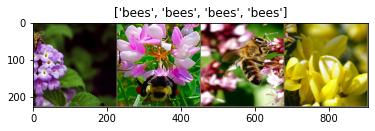

In [6]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

## Training the model

Now, let's write a general function to train a model. Here, we will
illustrate:

-  Scheduling the learning rate
-  Saving the best model

In the following, parameter ``scheduler`` is an LR scheduler object from
``torch.optim.lr_scheduler``.



In [7]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

### Visualizing the model predictions

Generic function to display predictions for a few images




In [8]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

## Finetuning the convnet

Load a pretrained model and reset final fully connected layer.




In [9]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

### Train and evaluate

It should take around 15-25 min on CPU. On GPU though, it takes less than a
minute.




In [10]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6033 Acc: 0.7090
val Loss: 0.6299 Acc: 0.7582

Epoch 1/24
----------
train Loss: 0.4471 Acc: 0.8115
val Loss: 0.2248 Acc: 0.9216

Epoch 2/24
----------
train Loss: 0.5333 Acc: 0.7869
val Loss: 0.3532 Acc: 0.8824

Epoch 3/24
----------
train Loss: 0.5054 Acc: 0.8074
val Loss: 0.2386 Acc: 0.9216

Epoch 4/24
----------
train Loss: 0.6444 Acc: 0.7746
val Loss: 0.2411 Acc: 0.9020

Epoch 5/24
----------
train Loss: 0.6702 Acc: 0.7664
val Loss: 0.6888 Acc: 0.8562

Epoch 6/24
----------
train Loss: 0.5105 Acc: 0.8443
val Loss: 0.5498 Acc: 0.8170

Epoch 7/24
----------
train Loss: 0.5151 Acc: 0.7951
val Loss: 0.4819 Acc: 0.8824

Epoch 8/24
----------
train Loss: 0.5490 Acc: 0.7746
val Loss: 0.4001 Acc: 0.8824

Epoch 9/24
----------
train Loss: 0.3355 Acc: 0.8730
val Loss: 0.2917 Acc: 0.9281

Epoch 10/24
----------
train Loss: 0.3325 Acc: 0.8730
val Loss: 0.2598 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.2975 Acc: 0.8852
val Loss: 0.2659 Acc: 0.9216

Ep

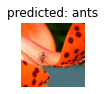

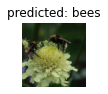

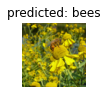

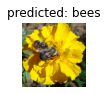

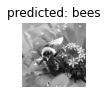

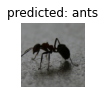

In [11]:
visualize_model(model_ft)

## ConvNet as fixed feature extractor

Here, we need to freeze all the network except the final layer. We need
to set ``requires_grad = False`` to freeze the parameters so that the
gradients are not computed in ``backward()``.

You can read more about this in the documentation
[here](https://pytorch.org/docs/notes/autograd.html#excluding-subgraphs-from-backward)_.




In [12]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

### Train and evaluate

On CPU this will take about half the time compared to previous scenario.
This is expected as gradients don't need to be computed for most of the
network. However, forward does need to be computed.




In [13]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6692 Acc: 0.6639
val Loss: 0.3489 Acc: 0.8627

Epoch 1/24
----------
train Loss: 0.4474 Acc: 0.8033
val Loss: 0.2719 Acc: 0.8954

Epoch 2/24
----------
train Loss: 0.6038 Acc: 0.7377
val Loss: 0.1888 Acc: 0.9216

Epoch 3/24
----------
train Loss: 0.3799 Acc: 0.8484
val Loss: 0.1873 Acc: 0.9346

Epoch 4/24
----------
train Loss: 0.5264 Acc: 0.8033
val Loss: 0.2015 Acc: 0.9216

Epoch 5/24
----------
train Loss: 0.4808 Acc: 0.7992
val Loss: 0.2110 Acc: 0.9346

Epoch 6/24
----------
train Loss: 0.3844 Acc: 0.8402
val Loss: 0.3463 Acc: 0.8693

Epoch 7/24
----------
train Loss: 0.4563 Acc: 0.7910
val Loss: 0.1996 Acc: 0.9477

Epoch 8/24
----------
train Loss: 0.3654 Acc: 0.8238
val Loss: 0.2055 Acc: 0.9412

Epoch 9/24
----------
train Loss: 0.3719 Acc: 0.8238
val Loss: 0.2105 Acc: 0.9412

Epoch 10/24
----------
train Loss: 0.3126 Acc: 0.8648
val Loss: 0.2144 Acc: 0.9281

Epoch 11/24
----------
train Loss: 0.3457 Acc: 0.8402
val Loss: 0.2094 Acc: 0.9346

Ep

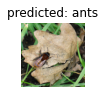

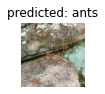

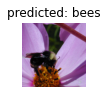

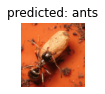

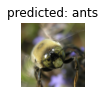

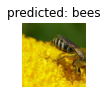

In [14]:
visualize_model(model_conv)

plt.ioff()
plt.show()